## Settings

In [1]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [15]:
p_load("WGCNA", "dplyr", "ggplot2",  "DESeq2", install = FALSE)

In [3]:
metadata <- read.csv("2022_08_12_CDL_regression_sample_annotation.csv", row.names = 1)
dds_all <- readRDS("03_outputs/03/dds_object_batch_group_wald.rds")
dds_ccl4 <- readRDS("03_outputs/03/dds_object_ccl4_group_wald.rds")
dds_taa <- readRDS("03_outputs/03/dds_object_taa_group_wald.rds")

In [4]:
dds_ccl4 <- vst(dds_ccl4, blind=FALSE)
dds_taa <- vst(dds_taa, blind=FALSE)
dds_all <- vst(dds_all, blind=FALSE)

In [5]:
ccl4_metadata <- read.csv("03_outputs/03/ccl4_samples_metadata_wald.csv",  row.names = 1)
taa_metadata <- read.csv(file="03_outputs/03/taa_samples_metadata_wald.csv",  row.names = 1)

expression_matrix_ccl4 <- assay(dds_ccl4)
expression_matrix_taa <- assay(dds_taa)
expression_matrix_all <- assay(dds_all)

## Preparation of WGCNA objects

In [6]:
ccl4_samples <- metadata[c(1:24),]

In [7]:
taa_samples <- metadata[c(25:48),]

In [8]:
ccl4_matrix <- expression_matrix_ccl4[, !colnames(expression_matrix_ccl4) %in% taa_samples$`Sample_id`]

In [9]:
taa_matrix <- expression_matrix_taa[, !colnames(expression_matrix_taa) %in% ccl4_samples$`Sample_id`]

## Pre-processing

In [10]:
#colnames_to_remove <- c('Model', 'Group', 'Model_group', 'Organism', 'Type', 'Age', 'Sex', 'Tissue', 'Treatment', 'Recovery', 'Concentration', 'Nanodrop_A260.A230', 'Nanodrop_A260.A280', 'RIN', 'FFS', 'CHOL', 'ALP', 'BA')
colnames_to_keep <- c('Sample_id', 'isCirrhotic', 'Regression', 'PP', 'CPA', 'ALT', 'AST')

In [11]:
metadata$isCirrhotic[metadata$isCirrhotic == "no"] <- 0 
metadata$isCirrhotic[metadata$isCirrhotic == "yes"] <- 1 
metadata$Regression[metadata$Regression == "negative"] <- 0 
metadata$Regression[metadata$Regression == "positive"] <- 0 
metadata$Regression[metadata$Regression == "regression"] <- 1
metadata <- metadata[, colnames(metadata) %in% colnames_to_keep]
metadata <- metadata %>% dplyr::rename(Cirrhosis = isCirrhotic)

ccl4_metadata$isCirrhotic[ccl4_metadata$isCirrhotic == "no"] <- 0 
ccl4_metadata$isCirrhotic[ccl4_metadata$isCirrhotic == "yes"] <- 1 
ccl4_metadata$Regression[ccl4_metadata$Regression == "negative"] <- 0 
ccl4_metadata$Regression[ccl4_metadata$Regression == "positive"] <- 0 
ccl4_metadata$Regression[ccl4_metadata$Regression == "regression"] <- 1
ccl4_metadata <- ccl4_metadata[, colnames(ccl4_metadata) %in% colnames_to_keep]
ccl4_metadata <- ccl4_metadata %>% dplyr::rename(Cirrhosis = isCirrhotic)

taa_metadata$isCirrhotic[taa_metadata$isCirrhotic == "no"] <- 0 
taa_metadata$isCirrhotic[taa_metadata$isCirrhotic == "yes"] <- 1 
taa_metadata$Regression[taa_metadata$Regression == "negative"] <- 0 
taa_metadata$Regression[taa_metadata$Regression == "positive"] <- 0 
taa_metadata$Regression[taa_metadata$Regression == "regression"] <- 1
taa_metadata <- taa_metadata[, colnames(taa_metadata) %in% colnames_to_keep]
taa_metadata <- taa_metadata %>% dplyr::rename(Cirrhosis = isCirrhotic)

In [12]:
expression_matrix_ccl4 <- t(expression_matrix_ccl4)
expression_matrix_taa <- t(expression_matrix_taa)
expression_matrix_all <- t(expression_matrix_all)

## Power calculations

### CCL4

In [13]:
cor_matrix_filtered <- expression_matrix_ccl4
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(cor_matrix_filtered, powerVector = powers, verbose = 5)
# Plot the results:
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

ERROR: Error in pickSoftThreshold(cor_matrix_filtered, powerVector = powers, : could not find function "pickSoftThreshold"


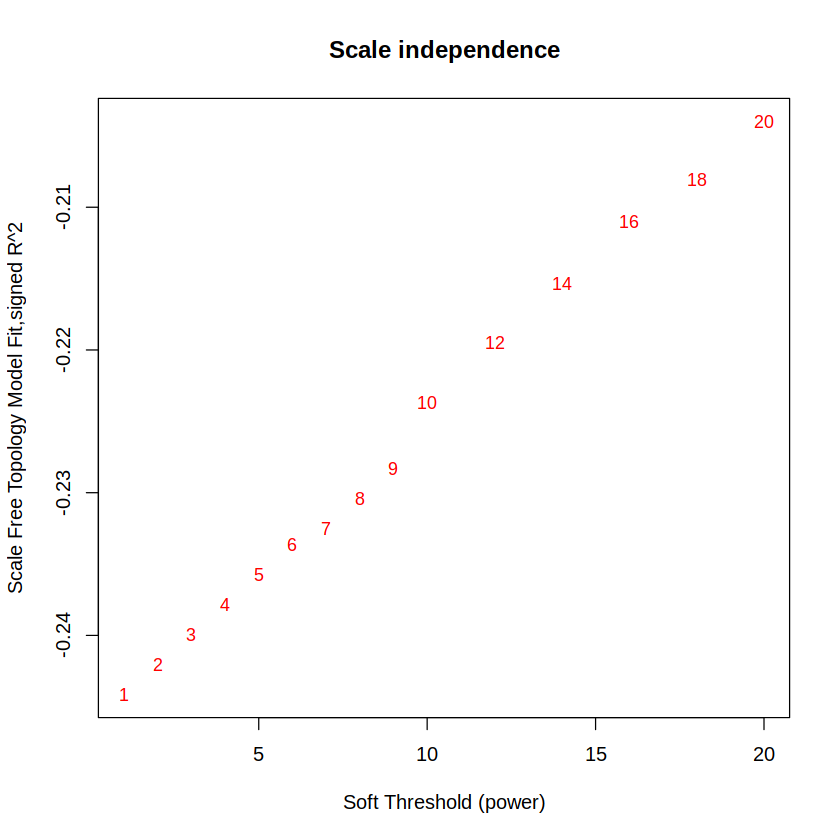

In [ ]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");

### TAA

In [ ]:
cor_matrix_filtered <- expression_matrix_taa
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(cor_matrix_filtered, powerVector = powers, verbose = 5)
# Plot the results:
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

pickSoftThreshold: will use block size 1729.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1729 of 25867
   ..working on genes 1730 through 3458 of 25867
   ..working on genes 3459 through 5187 of 25867
   ..working on genes 5188 through 6916 of 25867
   ..working on genes 6917 through 8645 of 25867
   ..working on genes 8646 through 10374 of 25867
   ..working on genes 10375 through 12103 of 25867
   ..working on genes 12104 through 13832 of 25867
   ..working on genes 13833 through 15561 of 25867
   ..working on genes 15562 through 17290 of 25867
   ..working on genes 17291 through 19019 of 25867
   ..working on genes 19020 through 20748 of 25867
   ..working on genes 20749 through 22477 of 25867
   ..working on genes 22478 through 24206 of 25867
   ..working on genes 24207 through 25867 of 25867
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.134  2.340       -0.00462  5540.0   6410.00   9430
2      2 

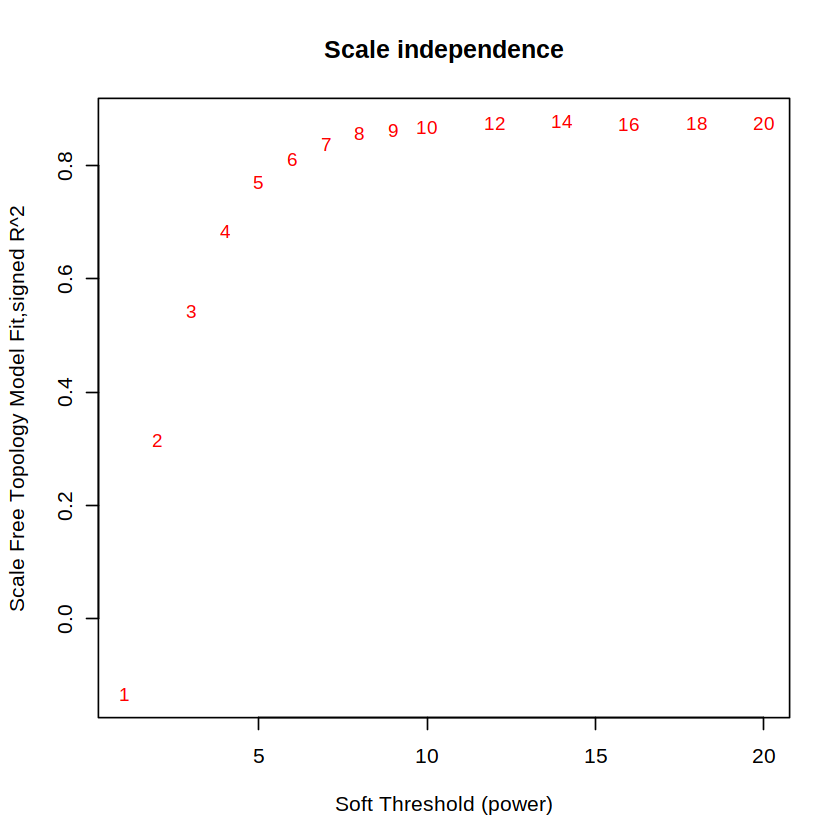

In [ ]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");

### All

In [ ]:
cor_matrix_filtered <- expression_matrix_all
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=40, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(cor_matrix_filtered, powerVector = powers, verbose = 5)
# Plot the results:
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

pickSoftThreshold: will use block size 1729.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1729 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 1 : 1729 ."


   ..working on genes 1730 through 3458 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 1730 : 3458 ."


   ..working on genes 3459 through 5187 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 3459 : 5187 ."


   ..working on genes 5188 through 6916 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 5188 : 6916 ."


   ..working on genes 6917 through 8645 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 6917 : 8645 ."


   ..working on genes 8646 through 10374 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 8646 : 10374 ."


   ..working on genes 10375 through 12103 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 10375 : 12103 ."


   ..working on genes 12104 through 13832 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 12104 : 13832 ."


   ..working on genes 13833 through 15561 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 13833 : 15561 ."


   ..working on genes 15562 through 17290 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 15562 : 17290 ."


   ..working on genes 17291 through 19019 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 17291 : 19019 ."


   ..working on genes 19020 through 20748 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 19020 : 20748 ."


   ..working on genes 20749 through 22477 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 20749 : 22477 ."


   ..working on genes 22478 through 24206 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 22478 : 24206 ."


   ..working on genes 24207 through 25867 of 25867


Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 24207 : 25867 ."


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.0626  0.388         0.0339 4440.00  4.84e+03   8160
2      2   0.7520 -0.380         0.6840 1800.00  1.59e+03   4700
3      3   0.8550 -0.674         0.8310  944.00  6.28e+02   3260
4      4   0.8850 -0.815         0.9040  572.00  2.77e+02   2480
5      5   0.8890 -0.922         0.9390  379.00  1.33e+02   2000
6      6   0.8910 -1.010         0.9520  267.00  7.23e+01   1660
7      7   0.8920 -1.080         0.9560  196.00  4.55e+01   1410
8      8   0.8980 -1.130         0.9620  149.00  2.71e+01   1210
9      9   0.9040 -1.180         0.9650  116.00  1.75e+01   1060
10    10   0.9070 -1.210         0.9640   92.20  1.21e+01    933
11    12   0.9230 -1.270         0.9720   61.40  5.39e+00    741
12    14   0.9300 -1.310         0.9730   43.00  2.56e+00    602
13    16   0.9360 -1.320         0.9770   31.40  1.31e+00    497
14    18   0.9340 -1.350         0.9730   23.70  7.14e-01    418
15    20   0.9340 -1.360 

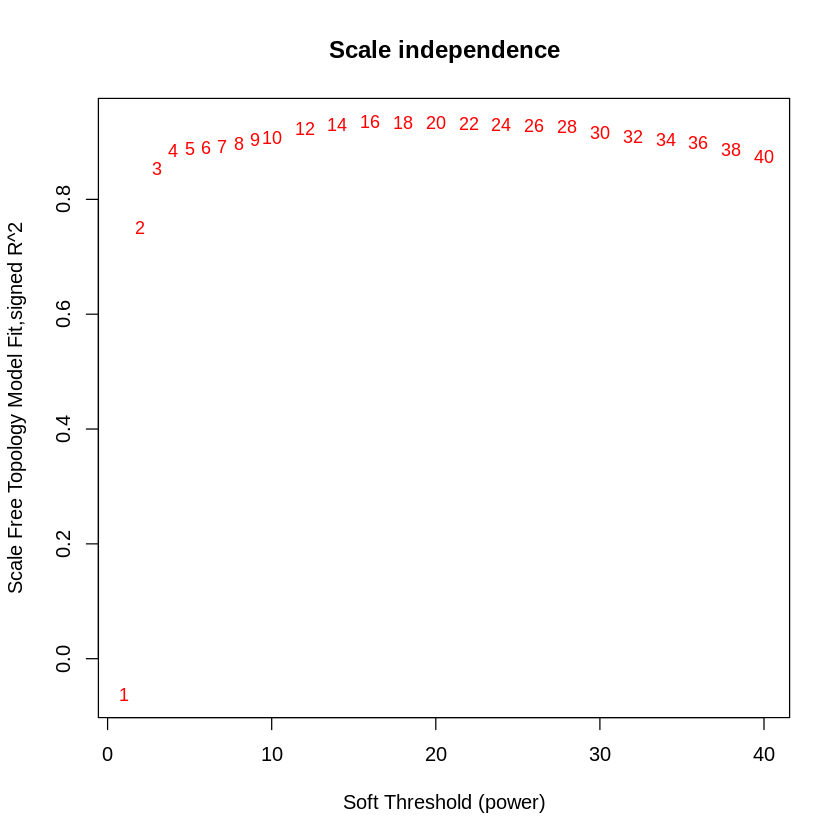

In [ ]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");

## WGCNA: CCl4 Model

### Network

In [16]:
gsg_ccl4 = goodSamplesGenes(expression_matrix_ccl4, verbose = 3);
gsg_ccl4$allOK

if (!gsg_ccl4$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg_ccl4$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(expression_matrix_ccl4)[!gsg_ccl4$goodGenes], collapse = ", ")));
if (sum(!gsg_ccl4$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(expression_matrix_ccl4)[!gsg_ccl4$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
expression_matrix_ccl4 = expression_matrix_ccl4[gsg_ccl4$goodSamples, gsg_ccl4$goodGenes]
}


 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 4752 genes from the calculation due to too many missing samples or zero variance.
  ..step 2


[1] FALSE

Removing genes: 


In [17]:
cor <- WGCNA::cor
net_ccl4 <- blockwiseModules(expression_matrix_ccl4, power = wgcna_power_ccl4,
    networkType = "signed",
    TOMType = "signed", minModuleSize = 10,
    maxBlockSize = 30000,
    reassignThreshold = 0, mergeCutHeight = 0.25,
    numericLabels = TRUE, pamRespectsDendro = FALSE,
    saveTOMs = FALSE,
    verbose = 3)

table(net_ccl4$colors)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .


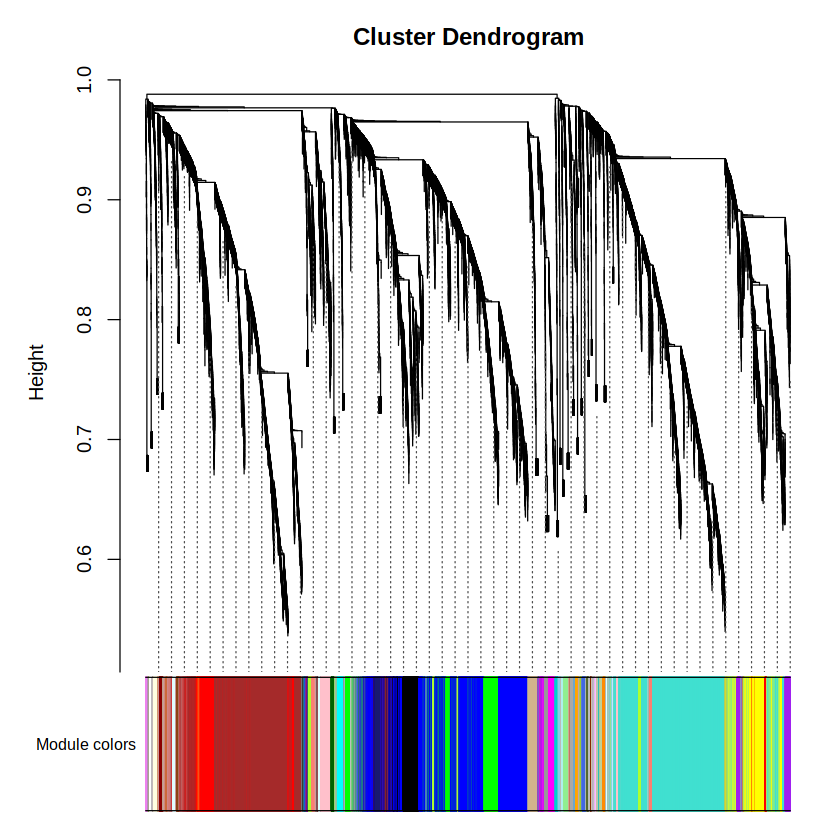

In [ ]:
mergedColors_ccl4 <- labels2colors(net_ccl4$colors)
plotDendroAndColors(net_ccl4$dendrograms[[1]], mergedColors_ccl4[net_ccl4$blockGenes[[1]]],
    "Module colors",
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)

In [ ]:
# Define numbers of genes and samples
nGenes_ccl4 = ncol(expression_matrix_ccl4)
nSamples_ccl4 = nrow(expression_matrix_ccl4)
moduleColors_ccl4 = labels2colors(net_ccl4$colors)
# Recalculate MEs with color labels
MEs0_ccl4 = moduleEigengenes(expression_matrix_ccl4, moduleColors_ccl4)$eigengenes
MEs_ccl4 = orderMEs(MEs0_ccl4)
moduleTraitCor_ccl4 = cor(MEs_ccl4, ccl4_metadata, use = "p");
moduleTraitPvalue_ccl4 = corPvalueStudent(moduleTraitCor_ccl4, nSamples_ccl4);

Warning message in storage.mode(y) <- "double":
"NAs introduced by coercion"


In [ ]:
sizeGrWindow(10,6)
# Will display correlations and their p-values
textMatrix_ccl4 = paste(signif(moduleTraitCor_ccl4, 2), "\n(",
    signif(moduleTraitPvalue_ccl4, 1), ")", sep = "")
dim(textMatrix_ccl4) = dim(moduleTraitCor_ccl4)
par(mar = c(6, 8.5, 3, 3));

In [ ]:
moduleTraitCor_ccl4_ph <- moduleTraitCor_ccl4[, colnames(moduleTraitCor_ccl4) != "Sample_id"]
moduleTraitPvalue_ccl4 <- moduleTraitPvalue_ccl4[, colnames(moduleTraitPvalue_ccl4) != "Sample_id"]

In [ ]:
options(scipen=999)
moduleTraitPvalue_ccl4[moduleTraitPvalue_ccl4 > 0.05] <- ""
class(moduleTraitPvalue_ccl4) <- "numeric"
options(scipen=0)
moduleTraitPvalue_ccl4 <- signif(moduleTraitPvalue_ccl4, 3)
moduleTraitPvalue_ccl4[is.na(moduleTraitPvalue_ccl4)] <- "ns"

In [ ]:
library("pheatmap")

In [ ]:
colfunc <- colorRampPalette(c("#9f294c", "#e4f0ff", "#27678a"))
col_100 <- colfunc(100)
col_100 <- col_100[rev(1:length(col_100))]

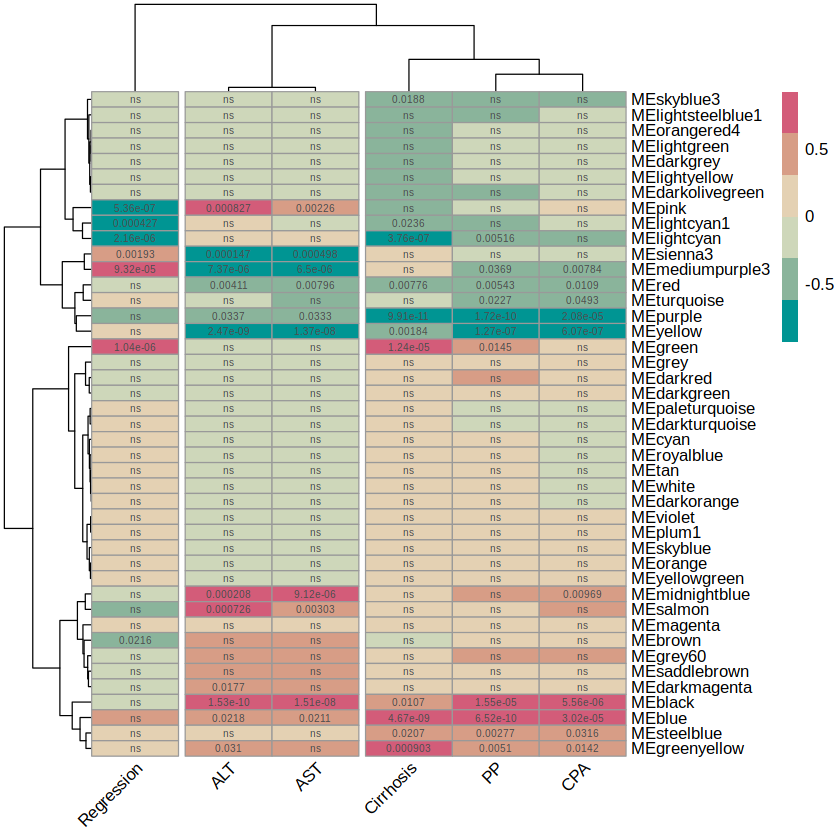

In [ ]:
F3_A <- pheatmap(moduleTraitCor_ccl4_ph, color = col_100,
  show_rownames = TRUE, cluster_cols = TRUE,
  cluster_rows = TRUE,
  show_colnames = TRUE, angle_col = "45",
  clustering_method = "ward.D2",
  cutree_cols = 3,
  display_numbers = moduleTraitPvalue_ccl4,
  fontsize_number=6)

In [52]:
ggsave("03_outputs/07/ccl4_wgcna_heatmap.png", F3_A, device = "png")

Saving 6.67 x 6.67 in image


### Modules of interest

In [26]:
modules_of_interest_ccl4 <- c("black", "purple", "blue", "lightcyan", "pink")

In [27]:
module_df_ccl4 <- data.frame(
  gene_id = names(net_ccl4$colors),
  colors = labels2colors(net_ccl4$colors)
)

In [105]:
weight = as.data.frame(ccl4_metadata$AST);
names(weight) = "AST"
# names (colors) of the modules
modNames = substring(names(MEs_ccl4), 3)

In [106]:
geneModuleMembership = as.data.frame(cor(expression_matrix_ccl4, MEs_ccl4, use = "p"));
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_ccl4), nSamples_ccl4));

In [107]:
names(geneModuleMembership_ccl4) = paste("MM", modNames_ccl4, sep="");
names(MMPvalue) = paste("p.MM", modNames_ccl4, sep="");
geneTraitSignificance = as.data.frame(cor(expression_matrix_ccl4, weight, use = "p"));
GSPvalue = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples_ccl4));
names(geneTraitSignificance) = paste("GS.", names(weight), sep="");
names(GSPvalue) = paste("p.GS.", names(weight), sep="");

In [78]:
PP_gw <- GSPvalue %>% filter(p.GS.PP < 0.01) %>% arrange()
Reg_gw <- GSPvalue %>% filter(p.GS.Regression < 0.01) %>% arrange()
CPA_gw <- GSPvalue %>% filter(p.GS.CPA < 0.01) %>% arrange()
Cir_gw <- GSPvalue %>% filter(p.GS.Cirrhosis < 0.01) %>% arrange()
ALT_gw <- GSPvalue %>% filter(p.GS.ALT < 0.01) %>% arrange()
AST_gw <- GSPvalue %>% filter(p.GS.AST < 0.01) %>% arrange()

In [28]:
submod_ccl4 = module_df_ccl4 %>%
  subset(colors %in% modules_of_interest_ccl4)

In [29]:
row.names(module_df_ccl4) = module_df_ccl4$gene_id

In [30]:
subexpr_ccl4 <- assay(dds_ccl4)[submod_ccl4$gene_id,]

In [33]:
submod_df_ccl4 = data.frame(subexpr_ccl4) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  tidyr::pivot_longer(-gene_id) %>%
  mutate(
    module = module_df_ccl4[gene_id,]$colors
  )

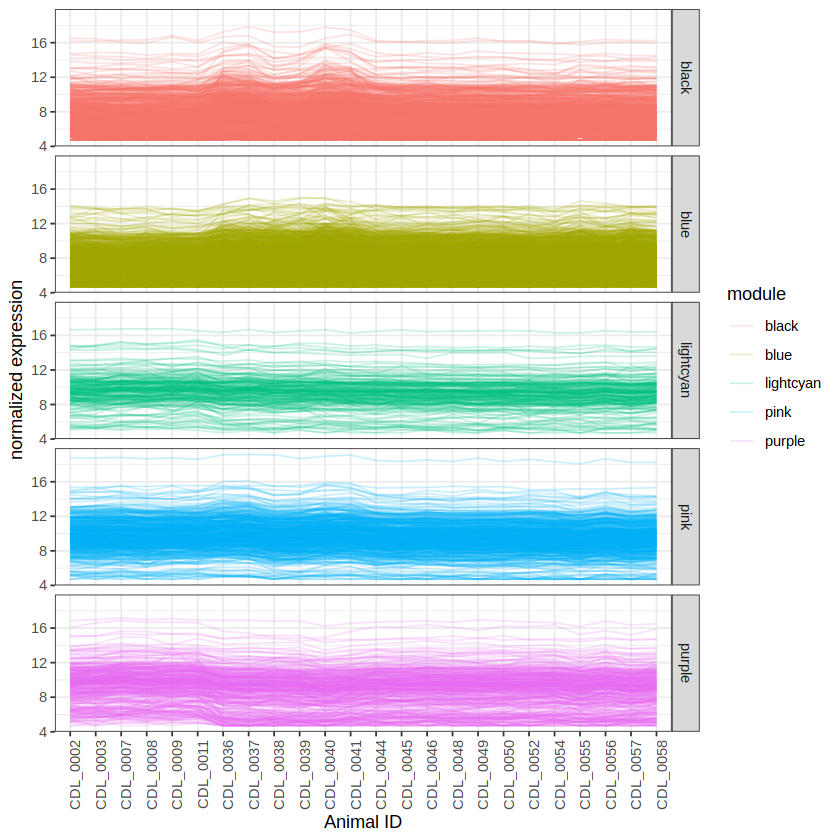

In [34]:
submod_df_ccl4 %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "Animal ID",
       y = "normalized expression")


In [38]:
geneModuleMembership_ccl4 <- as.data.frame(cor(expression_matrix_ccl4, MEs_ccl4, use = "p"))
MMPvalue_ccl4 <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_ccl4), nSamples_ccl4))
modNames_ccl4 <- substring(names(MEs_ccl4), 3)
names(geneModuleMembership_ccl4) = paste("MM", modNames_ccl4, sep="")
names(MMPvalue_ccl4) = paste("p.MM", modNames_ccl4, sep="")

In [39]:
# Define variable weight containing the weight column of datTrait
meta_pp_ccl4 <- as.data.frame(ccl4_metadata$PP)
meta_cpa_ccl4 <- as.data.frame(ccl4_metadata$CPA)
meta_regression_ccl4 <- as.data.frame(ccl4_metadata$Regression)
meta_alt_ccl4 <- as.data.frame(ccl4_metadata$ALT)
meta_ast_ccl4 <- as.data.frame(ccl4_metadata$AST)
meta_cirrhosis_ccl4 <- as.data.frame(ccl4_metadata$Cirrhosis)

names(meta_pp_ccl4) <- "PP"
names(meta_cpa_ccl4) <- "CPA"
names(meta_regression_ccl4) <- "Regression"
names(meta_alt_ccl4) <- "ALT"
names(meta_ast_ccl4) <- "AST"
names(meta_cirrhosis_ccl4) <- "Cirrhosis"

columns_list <- list(meta_pp_ccl4, meta_cpa_ccl4, meta_regression_ccl4, meta_alt_ccl4, meta_ast_ccl4, meta_cirrhosis_ccl4)

In [40]:
get_gene_ranks <- function(columns_list){
    iter = 1
    for (col in columns_list){
        readout = names(columns_list[[iter]])
        meta = col
        gts_name = paste("geneTraitSignificance", readout, "ccl4", sep = "_")
        gsp_name = paste("GSPvalue", readout, "ccl4", sep = "_")
        
        geneTraitSignificance = as.data.frame(cor(expression_matrix_ccl4, meta, use = "p"))
        GSPvalue_ccl4 = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples_ccl4))
        names(geneTraitSignificance) = paste("GS.", names(meta), sep="")
        names(GSPvalue_ccl4) = paste("p.GS.", names(meta), sep="")
        
        assign(gts_name, geneTraitSignificance, envir = .GlobalEnv)
        assign(gsp_name, GSPvalue_ccl4, envir = .GlobalEnv)
        
        iter = iter + 1
        }
    iter = 1
}

In [42]:
module_membership_correlations_plot <- function(columns_list, modules_of_interest, outputs_path){
    for (module in modules_of_interest){
            iter = 1
            for (col in columns_list){
                readout = names(columns_list[[iter]])
                gts_name <- eval(as.symbol(paste("geneTraitSignificance", readout, "ccl4", sep = "_")))
                module = module
                column = match(module, modNames_ccl4);
                moduleGenes = moduleColors_ccl4==module;

                x <- abs(geneModuleMembership_ccl4[moduleGenes, column])
                y <- abs(gts_name[moduleGenes, 1])
                

                cor_val <- round(cor(x, y), 2)
                p_val <- signif(cor.test(x,y, method = "pearson")$p.value, 2)

                tmp_plot <- ggplot(NULL, aes(x = x, y = y)) + 
                        geom_point(color = "black", fill = module, stroke = 0.25, shape = 21) +
                        labs(title = paste("Module membership vs. gene significance for", readout, "\n", "r = ", cor_val, ", p = ", p_val),
                             x = paste("Module Membership in", module, "module"), 
                             y = paste0("Gene significance for ", names(meta_pp_ccl4))) +
                        theme_minimal()
                
                ggsave(paste(outputs_path, "ccl4_", "corr_", readout, "_", module, ".png", sep = ""), tmp_plot, device = "png")
                
                iter = iter + 1
}}}

In [66]:
ccl4_modules_traits <- cbind(geneModuleMembership_ccl4, 
                            geneTraitSignificance_Regression_ccl4$GS.Regression, 
                            geneTraitSignificance_ALT_ccl4$GS.ALT,
                            geneTraitSignificance_AST_ccl4$GS.AST,
                            geneTraitSignificance_PP_ccl4$GS.PP,
                            geneTraitSignificance_Cirrhosis_ccl4$GS.Cirrhosis,
                            geneTraitSignificance_CPA_ccl4$GS.CPA)

write.csv(ccl4_modules_traits, "03_outputs/07/ccl4_modules_traits.csv")

### Export to Cytoscape

In [67]:
genes_of_interest_ccl4 = module_df_ccl4 %>%
  subset(colors %in% modules_of_interest_ccl4) 

In [68]:
expr_of_interest_ccl4 = assay(dds_ccl4)[genes_of_interest_ccl4$gene_id,]

In [70]:
TOM_ccl4 = TOMsimilarityFromExpr(t(expr_of_interest_ccl4),
                            power = wgcna_power_ccl4)

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [71]:
row.names(TOM_ccl4) = row.names(expr_of_interest_ccl4)
colnames(TOM_ccl4) = row.names(expr_of_interest_ccl4)

In [136]:
edge_list_ccl4 <- data.frame(TOM_ccl4) %>% mutate(gene1 = row.names(.)) %>% pivot_longer(-gene1) %>% 
                                rename(gene2 = name, weight = value) %>% 
                                filter(weight > 0.1 & weight < 1) %>% 
                                mutate(module1 = module_df_ccl4[gene1,]$colors, module2 = module_df_ccl4[gene2,]$colors)

In [138]:
write_delim(edge_list_ccl4,
            file = "03_outputs/07/ccl4_edgelist.tsv",
            delim = "\t")

## WGCNA: TAA Model

### Network

In [8]:
gsg_taa = goodSamplesGenes(expression_matrix_taa, verbose = 3);
gsg_taa$allOK

if (!gsg_taa$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg_taa$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(expression_matrix_taa)[!gsg_taa$goodGenes], collapse = ", ")));
if (sum(!gsg_taa$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(expression_matrix_taa)[!gsg_taa$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
expression_matrix_taa = expression_matrix_taa[gsg_taa$goodSamples, gsg_taa$goodGenes]
}


 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 4568 genes from the calculation due to too many missing samples or zero variance.
  ..step 2


[1] FALSE

Removing genes: 


In [ ]:
net_taa <- blockwiseModules(expression_matrix_taa, power = wgcna_power_taa,
    networkType = "signed",
    TOMType = "signed", minModuleSize = 10,
    maxBlockSize = 30000,
    reassignThreshold = 0, mergeCutHeight = 0.25,
    numericLabels = TRUE, pamRespectsDendro = FALSE,
    saveTOMs = FALSE,
    verbose = 3)

In [10]:
table(net_taa$colors)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1834 4202 3284 2779 2674 2457 2387  197  184  163  162  148  129  117  109   98 
  16   17   18   19   20   21   22   23 
  70   60   47   43   41   39   38   37 

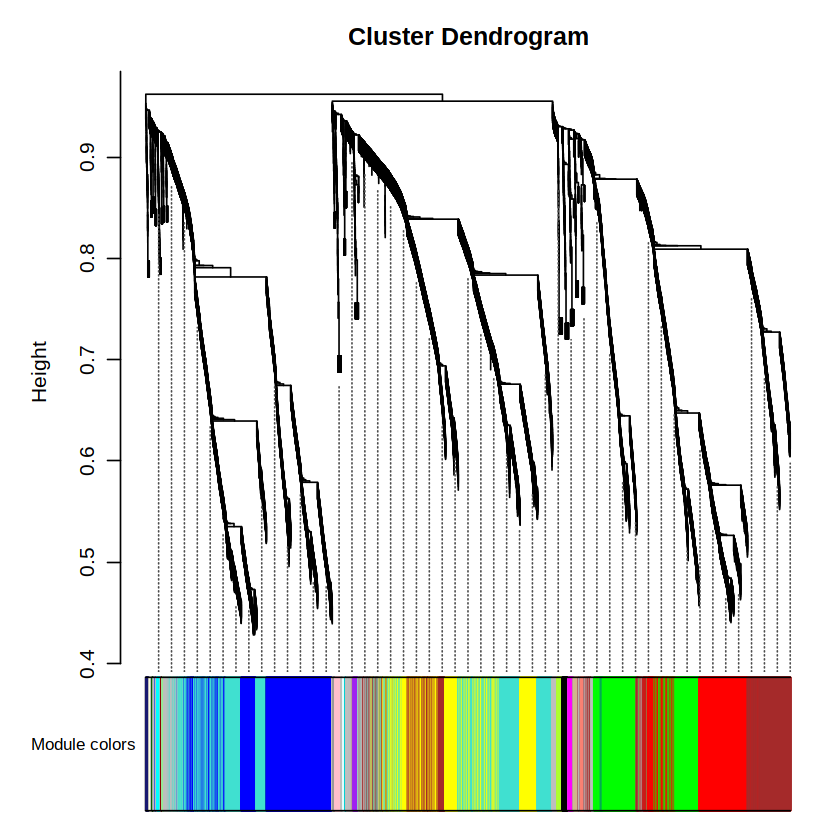

In [11]:
mergedColors_taa <- labels2colors(net_taa$colors)
plotDendroAndColors(net_taa$dendrograms[[1]], mergedColors_taa[net_taa$blockGenes[[1]]],
    "Module colors",
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)

In [ ]:
# Define numbers of genes and samples
nGenes_taa = ncol(expression_matrix_taa)
nSamples_taa = nrow(expression_matrix_taa)
moduleColors_taa = labels2colors(net_taa$colors)
# Recalculate MEs with color labels
MEs0_taa = moduleEigengenes(expression_matrix_taa, moduleColors_taa)$eigengenes
MEs_taa = orderMEs(MEs0_taa)
moduleTraitCor_taa = cor(MEs_taa, taa_metadata, use = "p");
moduleTraitPvalue_taa = corPvalueStudent(moduleTraitCor_taa, nSamples_taa);

In [13]:
sizeGrWindow(10,6)
# Will display correlations and their p-values
textMatrix_taa = paste(signif(moduleTraitCor_taa, 2), "\n(",
    signif(moduleTraitPvalue_taa, 1), ")", sep = "")
dim(textMatrix_taa) = dim(moduleTraitCor_taa)
par(mar = c(6, 8.5, 3, 3));

In [14]:
moduleTraitCor_taa_ph <- moduleTraitCor_taa[, colnames(moduleTraitCor_taa) != "Sample_id"]
moduleTraitPvalue_taa <- moduleTraitPvalue_taa[, colnames(moduleTraitPvalue_taa) != "Sample_id"]

In [15]:
options(scipen=999)
moduleTraitPvalue_taa[moduleTraitPvalue_taa > 0.05] <- ""
class(moduleTraitPvalue_taa) <- "numeric"
options(scipen=0)
moduleTraitPvalue_taa <- signif(moduleTraitPvalue_taa, 3)
moduleTraitPvalue_taa[is.na(moduleTraitPvalue_taa)] <- "ns"

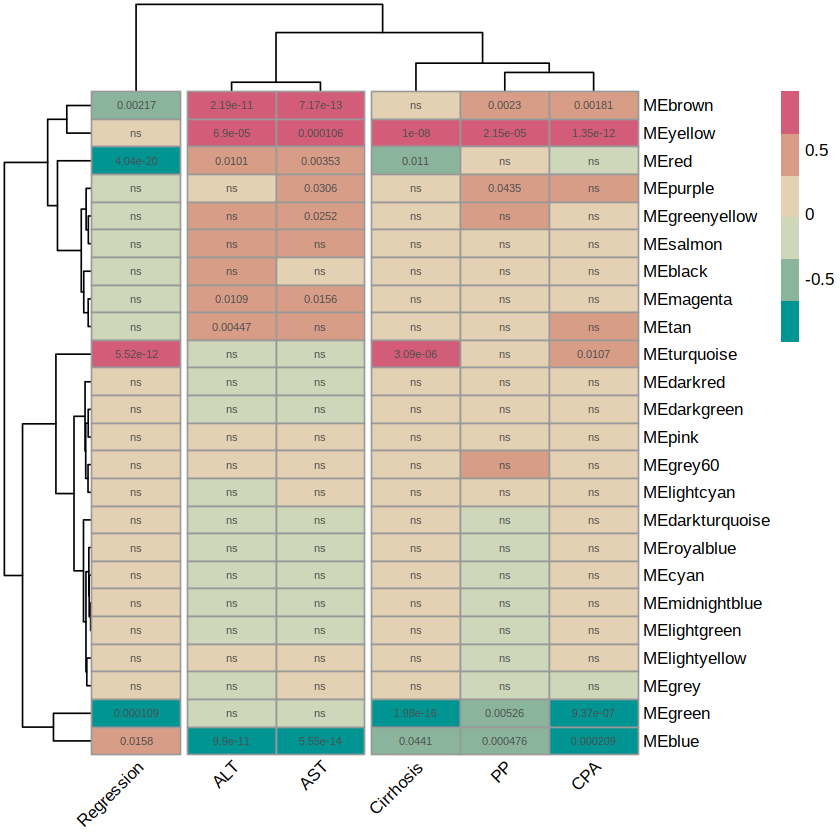

In [16]:
F3_B <- pheatmap(moduleTraitCor_taa_ph, color = hcl.colors(6, "TealRose"),
  show_rownames = TRUE, cluster_cols = TRUE,
  cluster_rows = TRUE,
  show_colnames = TRUE, angle_col = "45",
  clustering_method = "ward.D2",
  cutree_cols = 3,
  display_numbers = moduleTraitPvalue_taa,
  fontsize_number=6)

In [17]:
ggsave("03_outputs/07/taa_wgcna_heatmap.png", F3_B, device = "png")

Saving 6.67 x 6.67 in image


### Modules of interest

In [18]:
modules_of_interest_taa <- c("brown", "turquoise", "red", "green", "blue", "yellow")

In [19]:
module_df_taa <- data.frame(
  gene_id = names(net_taa$colors),
  colors = labels2colors(net_taa$colors)
)

In [20]:
submod_taa = module_df_taa %>%
  subset(colors %in% modules_of_interest_taa)

In [21]:
row.names(module_df_taa) = module_df_taa$gene_id

In [22]:
subexpr_taa <- assay(dds_taa)[submod_taa$gene_id,]

In [23]:
submod_df_taa = data.frame(subexpr_taa) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  pivot_longer(-gene_id) %>%
  mutate(
    module = module_df_taa[gene_id,]$colors
  )

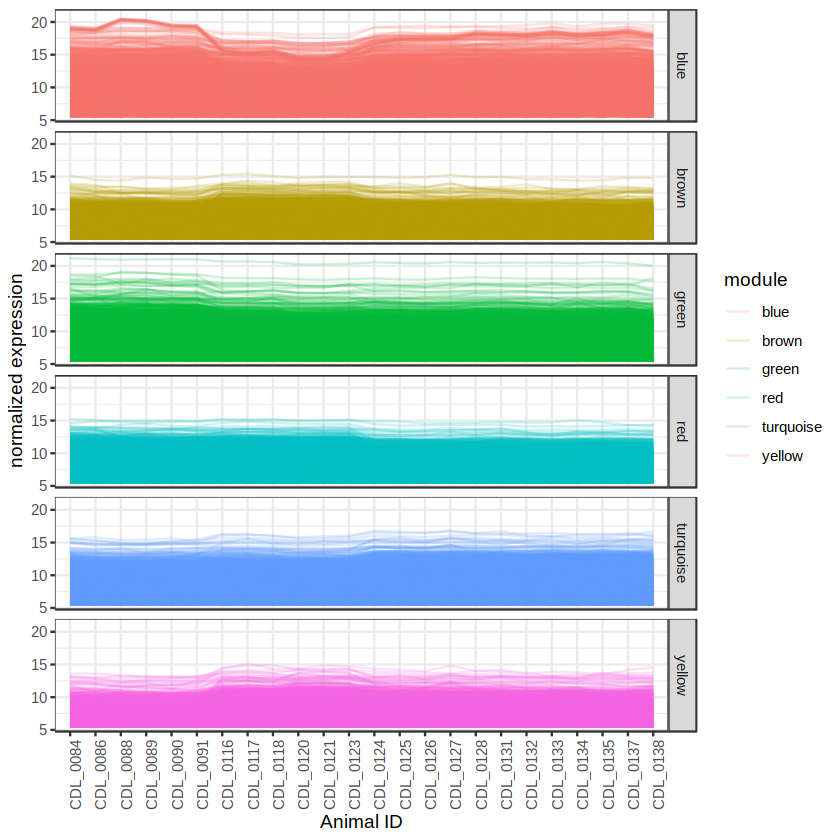

In [24]:
submod_df_taa %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "Animal ID",
       y = "normalized expression")


In [25]:
geneModuleMembership_taa <- as.data.frame(cor(expression_matrix_taa, MEs_taa, use = "p"))
MMPvalue_taa <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_taa), nSamples_taa))
modNames_taa <- substring(names(MEs_taa), 3)
names(geneModuleMembership_taa) = paste("MM", modNames_taa, sep="")
names(MMPvalue_taa) = paste("p.MM", modNames_taa, sep="")

In [26]:
# Define variable weight containing the weight column of datTrait
meta_pp_taa <- as.data.frame(taa_metadata$PP)
meta_cpa_taa <- as.data.frame(taa_metadata$CPA)
meta_regression_taa <- as.data.frame(taa_metadata$Regression)
meta_alt_taa <- as.data.frame(taa_metadata$ALT)
meta_ast_taa <- as.data.frame(taa_metadata$AST)
meta_cirrhosis_taa <- as.data.frame(taa_metadata$Cirrhosis)


names(meta_pp_taa) <- "PP"
names(meta_cpa_taa) <- "CPA"
names(meta_regression_taa) <- "Regression"
names(meta_cirrhosis_taa) <- "Cirrhosis"
names(meta_alt_taa) <- "ALT"
names(meta_ast_taa) <- "AST"

columns_list <- list(meta_pp_taa, meta_cpa_taa, meta_regression_taa, meta_alt_taa, meta_ast_taa, meta_cirrhosis_taa)

In [27]:
get_gene_ranks <- function(columns_list){
    iter = 1
    for (col in columns_list){
        readout = names(columns_list[[iter]])
        meta = col
        gts_name = paste("geneTraitSignificance", readout, "taa", sep = "_")
        gsp_name = paste("GSPvalue", readout, "taa", sep = "_")
        
        geneTraitSignificance = as.data.frame(cor(expression_matrix_taa, meta, use = "p"))
        GSPvalue_taa = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples_taa))
        names(geneTraitSignificance) = paste("GS.", names(meta), sep="")
        names(GSPvalue_taa) = paste("p.GS.", names(meta), sep="")
        
        assign(gts_name, geneTraitSignificance, envir = .GlobalEnv)
        assign(gsp_name, GSPvalue_taa, envir = .GlobalEnv)
        
        iter = iter + 1
        }
    iter = 1
}

In [53]:
get_gene_ranks(columns_list)

In [29]:
module_membership_correlations_plot <- function(columns_list, modules_of_interest, outputs_path){
    for (module in modules_of_interest){
            iter = 1
            for (col in columns_list){
                readout = names(columns_list[[iter]])
                gts_name <- eval(as.symbol(paste("geneTraitSignificance", readout, "taa", sep = "_")))
                module = module
                column = match(module, modNames_taa);
                moduleGenes = moduleColors_taa==module;

                x <- abs(geneModuleMembership_taa[moduleGenes, column])
                y <- abs(gts_name[moduleGenes, 1])
                

                cor_val <- round(cor(x, y), 2)
                p_val <- signif(cor.test(x,y, method = "pearson")$p.value, 2)

                tmp_plot <- ggplot(NULL, aes(x = x, y = y)) + 
                        geom_point(color = "black", fill = module, stroke = 0.25, shape = 21) +
                        labs(title = paste("Module membership vs. gene significance for", readout, "\n", "r = ", cor_val, ", p = ", p_val),
                             x = paste("Module Membership in", module, "module"), 
                             y = paste0("Gene significance for ", names(meta_pp_taa))) +
                        theme_minimal()
                
                ggsave(paste(outputs_path, "taa_", "corr_", readout, "_", module, ".png", sep = ""), tmp_plot, device = "png")
                
                iter = iter + 1
}}}

In [30]:
module_membership_correlations_plot(columns_list, modules_of_interest_taa, "03_outputs/07/")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 i

In [31]:
taa_modules_traits <- cbind(geneModuleMembership_taa, geneTraitSignificance_Regression_taa$GS.Regression, 
             geneTraitSignificance_ALT_taa$GS.ALT,
            geneTraitSignificance_AST_taa$GS.AST,
            geneTraitSignificance_PP_taa$GS.PP,
            geneTraitSignificance_Cirrhosis_taa$GS.Cirrhosis,
            geneTraitSignificance_CPA_taa$GS.CPA)

write.csv(taa_modules_traits, "03_outputs/07/taa_modules_traits.csv")

### Export to Cytoscape

In [139]:
genes_of_interest_taa = module_df_taa %>%
  subset(colors %in% modules_of_interest_taa) 

In [140]:
expr_of_interest_taa = assay(dds_taa)[genes_of_interest_taa$gene_id,]

In [141]:
TOM_taa = TOMsimilarityFromExpr(t(expr_of_interest_taa),
                            power = wgcna_power_taa)

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [142]:
row.names(TOM_taa) = row.names(expr_of_interest_taa)
colnames(TOM_taa) = row.names(expr_of_interest_taa)

In [143]:
edge_list_taa <- data.frame(TOM_taa) %>% mutate(gene1 = row.names(.)) %>% pivot_longer(-gene1) %>% 
                                rename(gene2 = name, weight = value) %>% 
                                filter(weight > 0.1 & weight < 1) %>% 
                                mutate(module1 = module_df_taa[gene1,]$colors, module2 = module_df_taa[gene2,]$colors)

In [147]:
write_delim(edge_list_taa,
            file = "03_outputs/07/taa_edgelist.tsv",
            delim = "\t")

In [52]:
write.csv(module_df_ccl4, "03_outputs/07/module_ccl4.csv")

In [109]:
write.csv(PP_gw, "03_outputs/07/pp_gw_ccl4.csv")
write.csv(Reg_gw, "03_outputs/07/reg_gw_ccl4.csv")
write.csv(CPA_gw, "03_outputs/07/cpa_gw_ccl4.csv")
write.csv(Cir_gw, "03_outputs/07/cir_gw_ccl4.csv")
write.csv(ALT_gw, "03_outputs/07/alt_gw_ccl4.csv")
write.csv(AST_gw, "03_outputs/07/ast_gw_ccl4.csv")

## Merged

### Network

In [18]:
gsg_all = goodSamplesGenes(expression_matrix_all, verbose = 3);
gsg_all$allOK

if (!gsg_all$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg_all$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(expression_matrix_all)[!gsg_all$goodGenes], collapse = ", ")));
if (sum(!gsg_all$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(expression_matrix_all)[!gsg_all$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
expression_matrix_all = expression_matrix_all[gsg_all$goodSamples, gsg_all$goodGenes]
}

cor <- WGCNA::cor
net_all <- blockwiseModules(expression_matrix_all, power = wgcna_power_all,
    TOMType = "unsigned", minModuleSize = 10,
    maxBlockSize = 30000,
    reassignThreshold = 0, mergeCutHeight = 0.25,
    numericLabels = TRUE, pamRespectsDendro = FALSE,
    saveTOMs = FALSE,
    verbose = 3)

mergedColors_all <- labels2colors(net_all$colors)
plotDendroAndColors(net_all$dendrograms[[1]], mergedColors_all[net_all$blockGenes[[1]]],
    "Module colors",
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)

# Define numbers of genes and samples
nGenes_all = ncol(expression_matrix_all)
nSamples_all = nrow(expression_matrix_all)
moduleColors_all = labels2colors(net_all$colors)
# Recalculate MEs with color labels
MEs0_all = moduleEigengenes(expression_matrix_all, moduleColors_all)$eigengenes
MEs_all = orderMEs(MEs0_all)
moduleTraitCor_all = cor(MEs_all, metadata, use = "p");
moduleTraitPvalue_all = corPvalueStudent(moduleTraitCor_all, nSamples_all);

sizeGrWindow(10,6)
# Will display correlations and their p-values
textMatrix_all = paste(signif(moduleTraitCor_all, 2), "\n(",
    signif(moduleTraitPvalue_all, 1), ")", sep = "")
dim(textMatrix_all) = dim(moduleTraitCor_all)
par(mar = c(6, 8.5, 3, 3));

In [19]:
moduleTraitCor_all_ph <- moduleTraitCor_all[, colnames(moduleTraitCor_all) != "Sample_id"]
moduleTraitPvalue_all <- moduleTraitPvalue_all[, colnames(moduleTraitPvalue_all) != "Sample_id"]
options(scipen=999)
moduleTraitPvalue_all[moduleTraitPvalue_all > 0.05] <- ""
class(moduleTraitPvalue_all) <- "numeric"
options(scipen=0)
moduleTraitPvalue_all <- signif(moduleTraitPvalue_all, 3)
moduleTraitPvalue_all[is.na(moduleTraitPvalue_all)] <- "ns"

In [20]:
sig_modules <- c("MElightcyan1", "MEblack", "MEgrey60", "MElavenderblush3", "MEplum1", "MEorange", "MEpink", "MEblue", "MEyellow", "MEpalevioletred3", "MEpurple",
"MEred", "MEyellowgreen", "MEbrown", "MEvioletMEturquoise", "MEturquoise", "MEgreen", "MEsalmon", "MEgrey", "MEthistle2", "MEpalevioletred3", "MElavenderblush3")

In [21]:
moduleTraitPvalue_all <- moduleTraitPvalue_all %>% as.data.frame() %>% filter(row.names(.) %in% sig_modules) 

In [22]:
moduleTraitCor_all_ph <- moduleTraitCor_all_ph %>% as.data.frame() %>% filter(row.names(.) %in% sig_modules) 

In [24]:
colfunc <- colorRampPalette(c("#9f294c", "#e4f0ff", "#27678a"))
col_100 <- colfunc(100)
col_100 <- col_100[rev(1:length(col_100))]

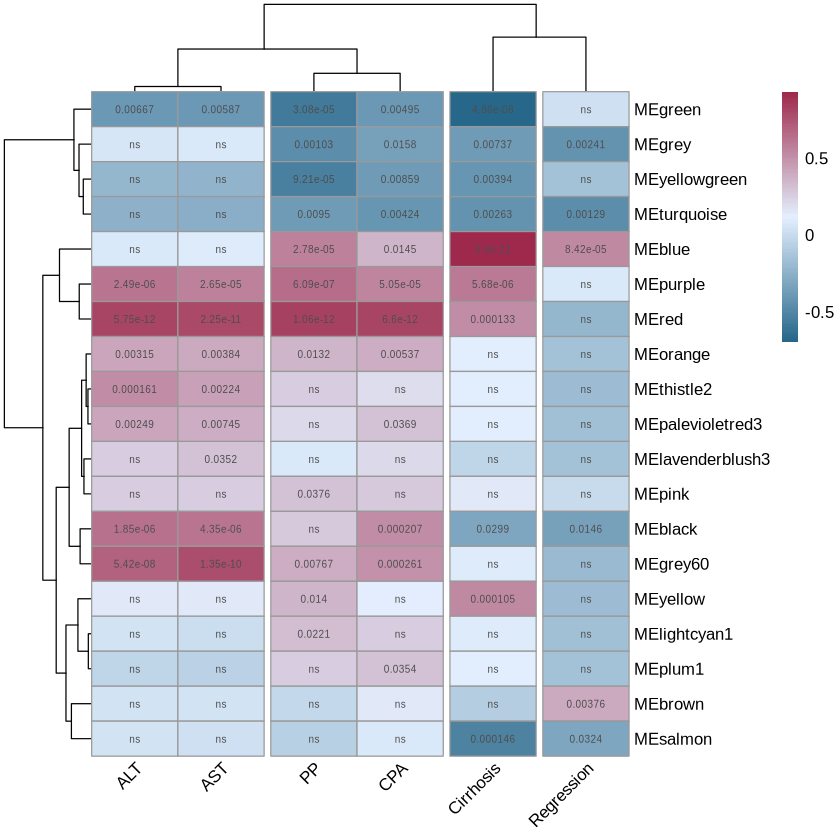

In [26]:
library("pheatmap")
F5_A <- pheatmap(moduleTraitCor_all_ph, 
  show_rownames = TRUE, cluster_cols = TRUE,
  cluster_rows = TRUE,
  show_colnames = TRUE, angle_col = "45",
  color = col_100,
  clustering_method = "ward.D2",
  cutree_cols = 4,
  display_numbers = moduleTraitPvalue_all,
  fontsize_number=6)

In [ ]:
ggsave("03_outputs/07/all_wgcna_heatmap.png", F5_A, device = "png")

Saving 6.67 x 6.67 in image


### Modules of interest

In [16]:
modules_of_interest_all <- c("magenta", "black", "green", "orange", "brown", "floralwhite", "grey", "blue")

In [17]:
module_df_all <- data.frame(
  gene_id = names(net_all$colors),
  colors = labels2colors(net_all$colors)
)

In [18]:
weight = as.data.frame(metadata[, 2:7]);
#names(weight) = rownames(metadata[, 2:7])
# names (colors) of the modules
modNames = substring(names(MEs_all), 3)

In [19]:
geneModuleMembership = as.data.frame(cor(expression_matrix_all, MEs_all, use = "p"));
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples_all));

In [20]:
names(geneModuleMembership) = paste("MM", modNames, sep="");
names(MMPvalue) = paste("p.MM", modNames, sep="");
geneTraitSignificance_all = as.data.frame(cor(expression_matrix_all, weight, use = "p"));
GSPvalue_all = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance_all), nSamples_all));
names(geneTraitSignificance_all) = paste("GS.", names(weight), sep="");
names(GSPvalue_all) = paste("p.GS.", names(weight), sep="");

In [21]:
PP_gw <- GSPvalue_all %>% filter(p.GS.PP < 0.01) %>% arrange()
Reg_gw <- GSPvalue_all %>% filter(p.GS.Regression < 0.01) %>% arrange()
CPA_gw <- GSPvalue_all %>% filter(p.GS.CPA < 0.01) %>% arrange()
Cir_gw <- GSPvalue_all %>% filter(p.GS.Cirrhosis < 0.01) %>% arrange()
ALT_gw <- GSPvalue_all %>% filter(p.GS.ALT < 0.01) %>% arrange()
AST_gw <- GSPvalue_all %>% filter(p.GS.AST < 0.01) %>% arrange()

In [22]:
submod_all <- module_df_all %>%
  subset(colors %in% modules_of_interest_all)

In [23]:
row.names(module_df_all) = module_df_all$gene_id

In [24]:
subexpr_all <- assay(dds_all)[submod_all$gene_id,]

In [25]:
submod_df_all = data.frame(subexpr_all) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  tidyr::pivot_longer(-gene_id) %>%
  mutate(
    module = module_df_all[gene_id,]$colors
  )

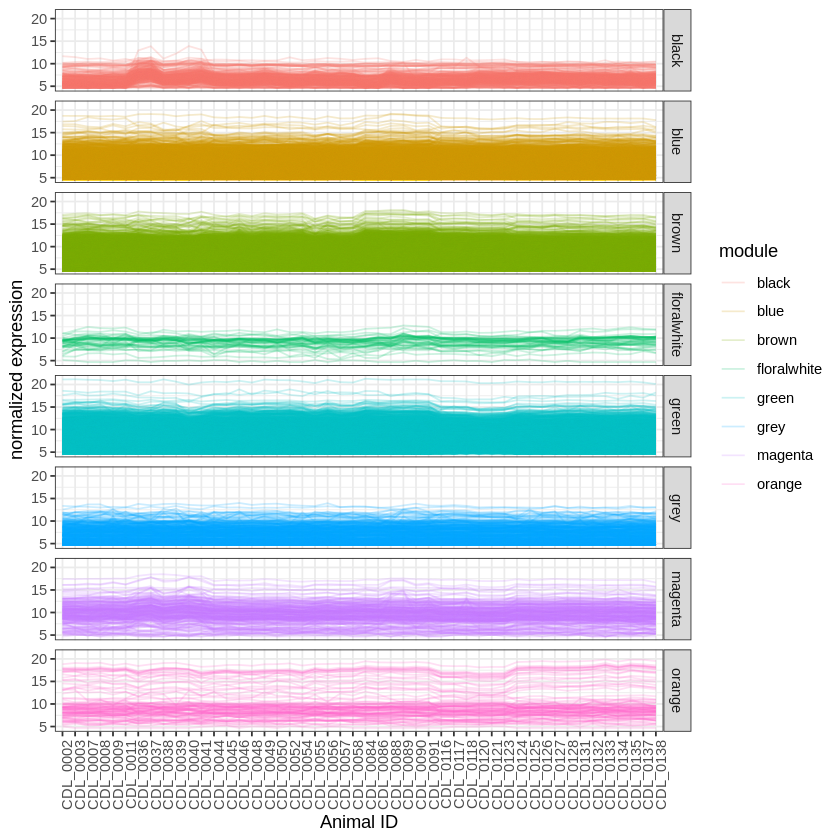

In [26]:
submod_df_all %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "Animal ID",
       y = "normalized expression")


In [27]:
geneModuleMembership_all <- as.data.frame(cor(expression_matrix_all, MEs_all, use = "p"))
MMPvalue_all <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_all), nSamples_all))
modNames_all <- substring(names(MEs_all), 3)
names(geneModuleMembership_all) = paste("MM", modNames_all, sep="")
names(MMPvalue_all) = paste("p.MM", modNames_all, sep="")
# Define variable weight containing the weight column of datTrait
meta_pp_all <- as.data.frame(metadata$PP)
meta_cpa_all <- as.data.frame(metadata$CPA)
meta_regression_all <- as.data.frame(metadata$Regression)
meta_alt_all <- as.data.frame(metadata$ALT)
meta_ast_all <- as.data.frame(metadata$AST)
meta_cirrhosis_all <- as.data.frame(metadata$Cirrhosis)

names(meta_pp_all) <- "PP"
names(meta_cpa_all) <- "CPA"
names(meta_regression_all) <- "Regression"
names(meta_alt_all) <- "ALT"
names(meta_ast_all) <- "AST"
names(meta_cirrhosis_all) <- "Cirrhosis"

columns_list <- list(meta_pp_all, meta_cpa_all, meta_regression_all, meta_alt_all, meta_ast_all, meta_cirrhosis_all)

In [28]:
get_gene_ranks <- function(columns_list){
    iter = 1
    for (col in columns_list){
        readout = names(columns_list[[iter]])
        meta = col
        gts_name = paste("geneTraitSignificance", readout, "all", sep = "_")
        gsp_name = paste("GSPvalue", readout, "all", sep = "_")
        
        geneTraitSignificance = as.data.frame(cor(expression_matrix_all, meta, use = "p"))
        GSPvalue_all = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples_all))
        names(geneTraitSignificance) = paste("GS.", names(meta), sep="")
        names(GSPvalue_all) = paste("p.GS.", names(meta), sep="")
        
        assign(gts_name, geneTraitSignificance, envir = .GlobalEnv)
        assign(gsp_name, GSPvalue_all, envir = .GlobalEnv)
        
        iter = iter + 1
        }
    iter = 1
}

In [31]:
get_gene_ranks(columns_list)

In [29]:
module_membership_correlations_plot <- function(columns_list, modules_of_interest, outputs_path){
    for (module in modules_of_interest){
            iter = 1
            for (col in columns_list){
                readout = names(columns_list[[iter]])
                gts_name <- eval(as.symbol(paste("geneTraitSignificance", readout, "all", sep = "_")))
                module = module
                column = match(module, modNames_all);
                moduleGenes = moduleColors_all==module;

                x <- abs(geneModuleMembership_all[moduleGenes, column])
                y <- abs(gts_name[moduleGenes, 1])
                

                cor_val <- round(cor(x, y), 2)
                p_val <- signif(cor.test(x,y, method = "pearson")$p.value, 2)

                tmp_plot <- ggplot(NULL, aes(x = x, y = y)) + 
                        geom_point(color = "black", fill = module, stroke = 0.25, shape = 21) +
                        labs(title = paste("Module membership vs. gene significance for", readout, "\n", "r = ", cor_val, ", p = ", p_val),
                             x = paste("Module Membership in", module, "module"), 
                             y = paste0("Gene significance for ", names(meta_pp_all))) +
                        theme_minimal()
                
                ggsave(paste(outputs_path, "all_", "corr_", readout, "_", module, ".png", sep = ""), tmp_plot, device = "png")
                
                iter = iter + 1
}}}

In [32]:
all_modules_traits <- cbind(geneModuleMembership_all, 
                            geneTraitSignificance_Regression_all$GS.Regression, 
                            geneTraitSignificance_ALT_all$GS.ALT,
                            geneTraitSignificance_AST_all$GS.AST,
                            geneTraitSignificance_PP_all$GS.PP,
                            geneTraitSignificance_Cirrhosis_all$GS.Cirrhosis,
                            geneTraitSignificance_CPA_all$GS.CPA)

write.csv(all_modules_traits, "03_outputs/07/all_modules_traits.csv")

In [33]:
GSPvalue_all <- GSPvalue_all %>% tibble::rownames_to_column("gene")
geneTraitSignificance_all <- geneTraitSignificance_all %>% tibble::rownames_to_column("gene")

In [40]:
all_p_gs <- merge(GSPvalue_all, geneTraitSignificance_all, by = "gene")

In [140]:
write.csv(all_p_gs, "03_outputs/07/all_genes_traits_value.csv")